In [1]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/BERT")
import numpy as np
from matplotlib import pyplot as plt
!pip install transformers
from transformers import AutoTokenizer

In [2]:
def read_data(path):
  with open(path) as f:
    data = f.read().splitlines()
  return data

In [3]:
data = read_data("80k_full_length_dataset/data.txt")
label = read_data("80k_full_length_dataset/label.txt")

In [6]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

sequence_length = 128

def encode_data(data, tokenizer):
  result = []
  for text in data:
    temp = tokenizer.encode(text)

    # if(len(temp) < sequence_length):
    #   temp += [1]*(sequence_length-len(temp))
    # elif len(temp) > sequence_length:
    #   temp = temp[:sequence_length]
    #   temp[-1] = tokenizer.eos_token_id
    result.append(temp)
  return result

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
data = encode_data(data, tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (261 > 256). Running this sequence through the model will result in indexing errors


In [19]:
len_data = [len(item) for item in data if len(item) < 500]

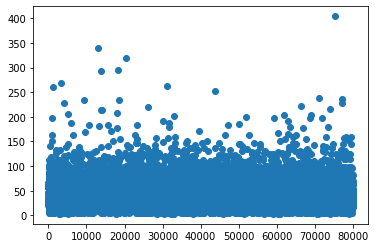

In [20]:
plt.scatter(list(range(len(len_data))), len_data)

(array([2.6900e+02, 2.3300e+02, 2.7700e+02, 1.7440e+03, 1.0025e+04,
        1.5168e+04, 1.3549e+04, 1.0435e+04, 7.9480e+03, 5.7390e+03,
        4.0520e+03, 2.8250e+03, 2.0580e+03, 1.4330e+03, 1.0470e+03,
        7.4600e+02, 5.2700e+02, 4.1700e+02, 2.7000e+02, 2.3300e+02,
        1.8100e+02, 1.4500e+02, 1.0300e+02, 1.1500e+02, 6.6000e+01,
        5.5000e+01, 4.3000e+01, 4.2000e+01, 3.7000e+01, 2.9000e+01,
        2.6000e+01, 2.8000e+01, 1.2000e+01, 1.8000e+01, 1.0000e+01,
        1.7000e+01, 6.0000e+00, 5.0000e+00, 7.0000e+00, 4.0000e+00,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 5.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.00

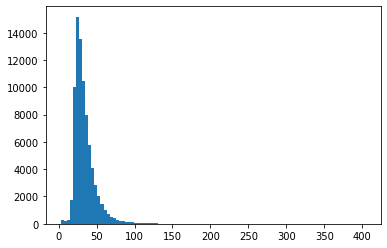

In [21]:
plt.hist(len_data, bins=100)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc8c8df0d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc8c8df7e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8c8dfeed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8c8dfe990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc8c8df7410>,
  <matplotlib.lines.Line2D at 0x7fc8c8df7950>]}

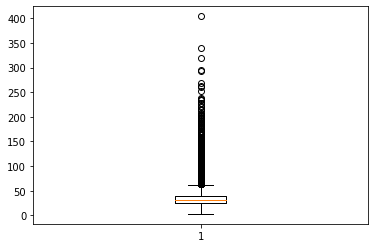

In [22]:
plt.boxplot(len_data)

In [23]:
np.mean(len_data)

34.645224195907346

In [25]:
len(data[0])

46

In [26]:
more_than_128 = [item for item in len_data if item > 64]

In [27]:
len(more_than_128)

2968